In [1]:
import os
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load language models
spacy.cli.download("en_core_web_sm")
spacy.cli.download("pt_core_news_sm")

nlp_en = spacy.load("en_core_web_sm")
nlp_pt = spacy.load("pt_core_news_sm")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.2 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 10.9 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:

# Function to read documents from a directory
def gen_documents_all(directory_path):
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, "r", encoding="utf-8") as file:
                yield file.read()

# Function to analyze min and max lengths
def min_max(documents, nlp):
    docs = ["".join(doc) for doc in documents]
    char_length = [len(document) for document in docs]
    word_length = [len(document.split()) for document in docs]
    token_length = [len(nlp(document)) for document in docs]

    return {
        "max_char_length": max(char_length),
        "min_char_length": min(char_length),
        "max_word_length": max(word_length),
        "min_word_length": min(word_length),
        "max_token_length": max(token_length),
        "min_token_length": min(token_length),
    }

# Function to analyze documents
def analyze_documents(documents, nlp):
    combined_text = " ".join(documents)
    doc = nlp(combined_text)

    # Basic Measures
    word_count = sum(1 for token in doc if token.is_alpha)
    token_count = len(doc)
    sentence_count = len(list(doc.sents))
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    # Vocabulary Measures
    vocabulary = set(token.text.lower() for token in doc if token.is_alpha and len(token) >1)
    vocab_size = len(vocabulary)
    type_token_ratio = vocab_size / word_count if word_count > 0 else 0

    # Word Frequency Distribution
    word_frequencies = Counter(token.text.lower() for token in doc if token.is_alpha).most_common(20)

    # POS Tag Distribution
    pos_frequencies = Counter(token.pos_ for token in doc)
    total_pos_count = sum(pos_frequencies.values())
    pos_proportions = {pos: count / total_pos_count for pos, count in pos_frequencies.items()}

    return {
        "word_count": word_count,
        "token_count": token_count,
        "sentence_count": sentence_count,
        "avg_sentence_length": avg_sentence_length,
        "vocabulary_size": vocab_size,
        "type_token_ratio": type_token_ratio,
        "word_frequencies": word_frequencies,
        "pos_distribution": pos_proportions,
    }

# Plotting functions
def plot_word_frequencies(word_frequencies, title):
    words, counts = zip(*word_frequencies)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top 20 Word Frequencies - {title}")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

def plot_pos_distribution(pos_distribution, title):
    pos_tags, proportions = zip(*pos_distribution.items())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(proportions), y=list(pos_tags), palette="coolwarm")
    plt.title(f"POS Tag Distribution - {title}")
    plt.xlabel("Proportion")
    plt.ylabel("POS Tags")
    plt.show()

# Function to process a directory
def process_directory(directory_path, nlp, title):
    documents = list(gen_documents_all(directory_path))
    analysis = analyze_documents(documents, nlp)
    length_analysis = min_max(documents, nlp)

    # Print analysis results
    print(f"Analysis for {title}:")
    for key, value in analysis.items():
        if isinstance(value, dict):
            print(f"  {key}:")
            for sub_key, sub_value in value.items():
                print(f"    {sub_key}: {sub_value:.4f}")
        elif isinstance(value, list):
            print(f"  {key}: {value[:3]}... (Top 3 of {len(value)})")
        else:
            print(f"  {key}: {value}")

    # Print min-max analysis
    print("\nLength Analysis:")
    for key, value in length_analysis.items():
        print(f"  {key}: {value}")

    # Plot results
    plot_word_frequencies(analysis["word_frequencies"], title)
    plot_pos_distribution(analysis["pos_distribution"], title)

    return analysis, length_analysis



Analysis for English Training Dataset:
  word_count: 53404
  token_count: 55979
  sentence_count: 173
  avg_sentence_length: 308.6936416184971
  vocabulary_size: 8069
  type_token_ratio: 0.15109355104486555
  word_frequencies: [('ukraine', 613), ('russia', 581), ('russian', 428)]... (Top 3 of 20)
  pos_distribution:
    PROPN: 0.2342
    VERB: 0.1171
    NOUN: 0.4230
    SPACE: 0.0390
    ADJ: 0.1441
    ADV: 0.0243
    NUM: 0.0042
    AUX: 0.0040
    DET: 0.0007
    ADP: 0.0053
    SCONJ: 0.0008
    X: 0.0012
    INTJ: 0.0012
    CCONJ: 0.0001
    PRON: 0.0005
    PUNCT: 0.0001
    PART: 0.0001
    SYM: 0.0001

Length Analysis:
  max_char_length: 3653
  min_char_length: 345
  max_word_length: 463
  min_word_length: 48
  max_token_length: 483
  min_token_length: 50


/tmp/ipykernel_13813/1773774827.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


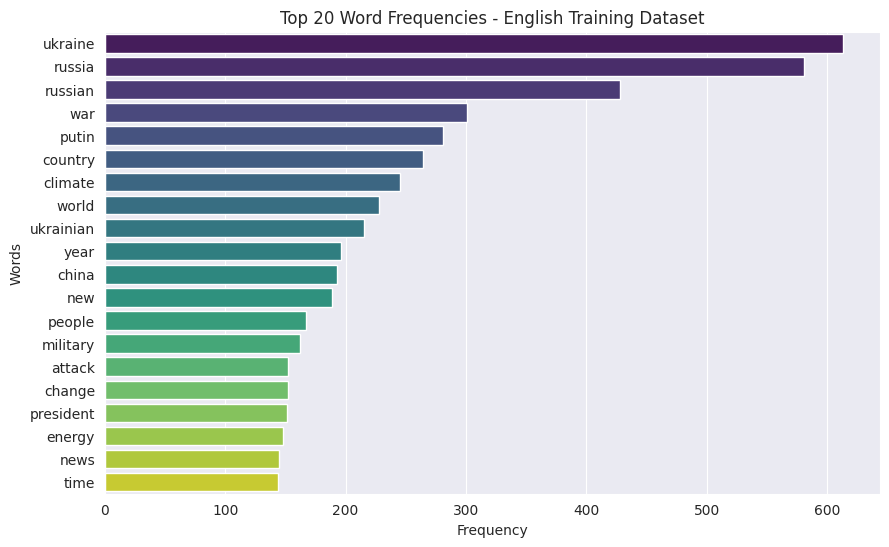

/tmp/ipykernel_13813/1773774827.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(proportions), y=list(pos_tags), palette="coolwarm")


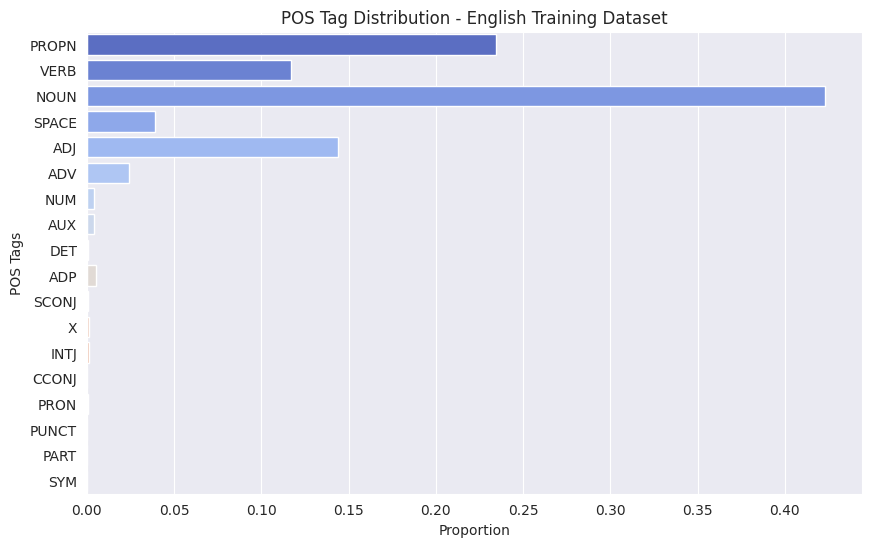

Analysis for Portuguese Training Dataset:
  word_count: 37281
  token_count: 39102
  sentence_count: 1228
  avg_sentence_length: 30.35912052117264
  vocabulary_size: 6785
  type_token_ratio: 0.18199619108929482
  word_frequencies: [('russo', 364), ('rússia', 356), ('ucrânia', 353)]... (Top 3 of 20)
  pos_distribution:
    NOUN: 0.3127
    PROPN: 0.0873
    VERB: 0.2636
    ADJ: 0.2574
    ADP: 0.0058
    ADV: 0.0288
    SPACE: 0.0286
    DET: 0.0050
    AUX: 0.0017
    X: 0.0015
    SCONJ: 0.0021
    PRON: 0.0017
    NUM: 0.0030
    CCONJ: 0.0005
    PUNCT: 0.0002
    SYM: 0.0001

Length Analysis:
  max_char_length: 3230
  min_char_length: 791
  max_word_length: 408
  min_word_length: 97
  max_token_length: 410
  min_token_length: 108


/tmp/ipykernel_13813/1773774827.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


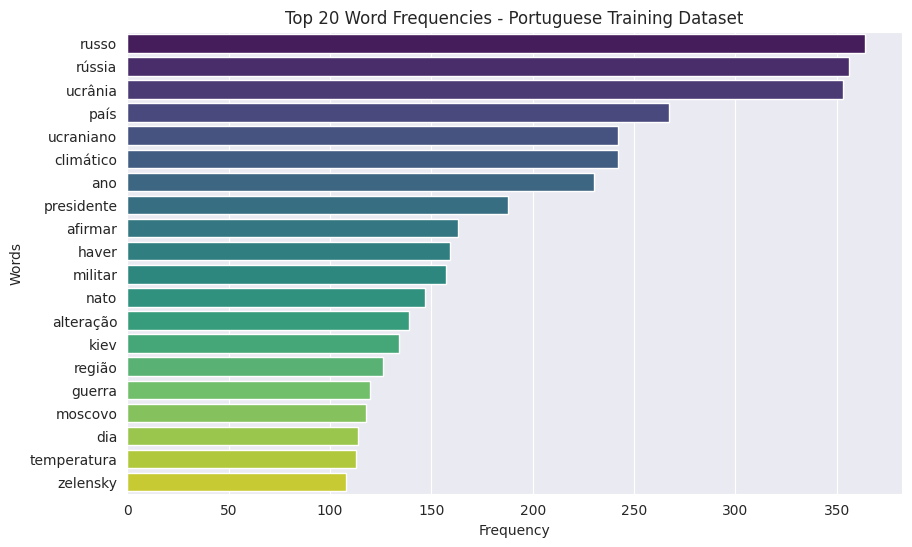

/tmp/ipykernel_13813/1773774827.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(proportions), y=list(pos_tags), palette="coolwarm")


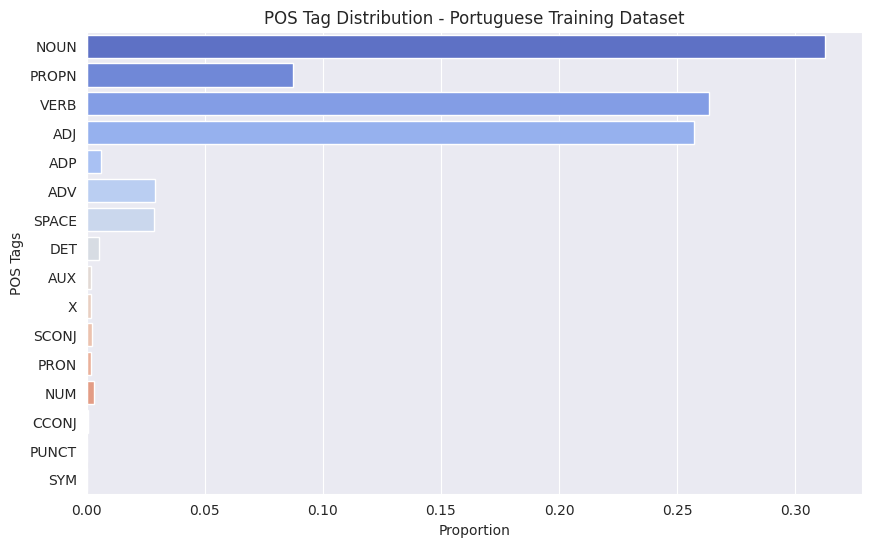

In [6]:
# Example usage
english_dir = "../training_data/EN/raw-documents"
portuguese_dir = "../training_data/PT/raw-documents"

english_analysis, english_lengths = process_directory(english_dir, nlp_en, "English Training Dataset")
portuguese_analysis, portuguese_lengths = process_directory(portuguese_dir, nlp_pt, "Portuguese Training Dataset")

Analysis for English Target Dataset:
  word_count: 102910
  token_count: 104473
  sentence_count: 343
  avg_sentence_length: 300.02915451895046
  vocabulary_size: 11464
  type_token_ratio: 0.11139830920221552
  word_frequencies: [('say', 1178), ('ukraine', 1008), ('russia', 955)]... (Top 3 of 20)
  pos_distribution:
    PROPN: 0.2312
    VERB: 0.1360
    NOUN: 0.4393
    SPACE: 0.0074
    ADJ: 0.1410
    ADV: 0.0249
    NUM: 0.0055
    ADP: 0.0051
    AUX: 0.0048
    INTJ: 0.0013
    X: 0.0013
    SCONJ: 0.0008
    DET: 0.0006
    CCONJ: 0.0001
    PRON: 0.0005
    PUNCT: 0.0001
    PART: 0.0001
    SYM: 0.0001

Length Analysis:
  max_char_length: 3671
  min_char_length: 344
  max_word_length: 478
  min_word_length: 49
  max_token_length: 480
  min_token_length: 49


/tmp/ipykernel_13813/1773774827.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


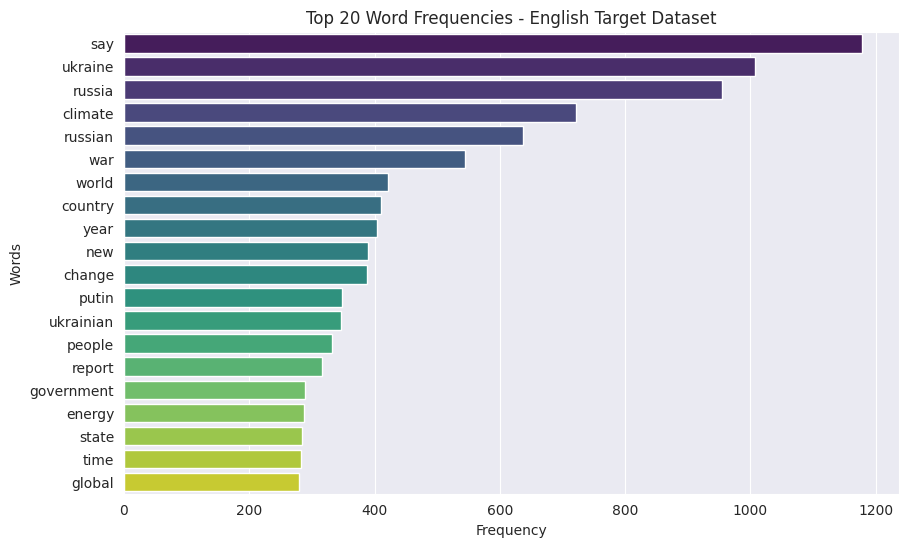

/tmp/ipykernel_13813/1773774827.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(proportions), y=list(pos_tags), palette="coolwarm")


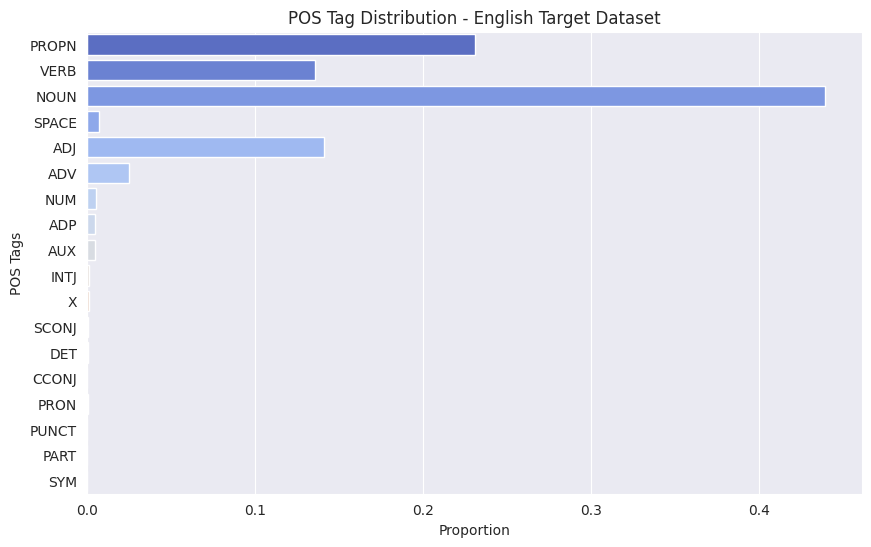

Analysis for Portuguese Target Dataset:
  word_count: 77607
  token_count: 79204
  sentence_count: 2318
  avg_sentence_length: 33.480155306298535
  vocabulary_size: 9369
  type_token_ratio: 0.12072364606285516
  word_frequencies: [('ucrânia', 900), ('russo', 819), ('rússia', 735)]... (Top 3 of 20)
  pos_distribution:
    NOUN: 0.3117
    PROPN: 0.0842
    VERB: 0.2656
    ADJ: 0.2667
    ADP: 0.0068
    ADV: 0.0294
    SCONJ: 0.0044
    DET: 0.0073
    AUX: 0.0127
    NUM: 0.0028
    X: 0.0016
    PRON: 0.0041
    SPACE: 0.0021
    CCONJ: 0.0004
    PUNCT: 0.0002
    SYM: 0.0000
    PART: 0.0000

Length Analysis:
  max_char_length: 3336
  min_char_length: 789
  max_word_length: 430
  min_word_length: 102
  max_token_length: 431
  min_token_length: 105


/tmp/ipykernel_13813/1773774827.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


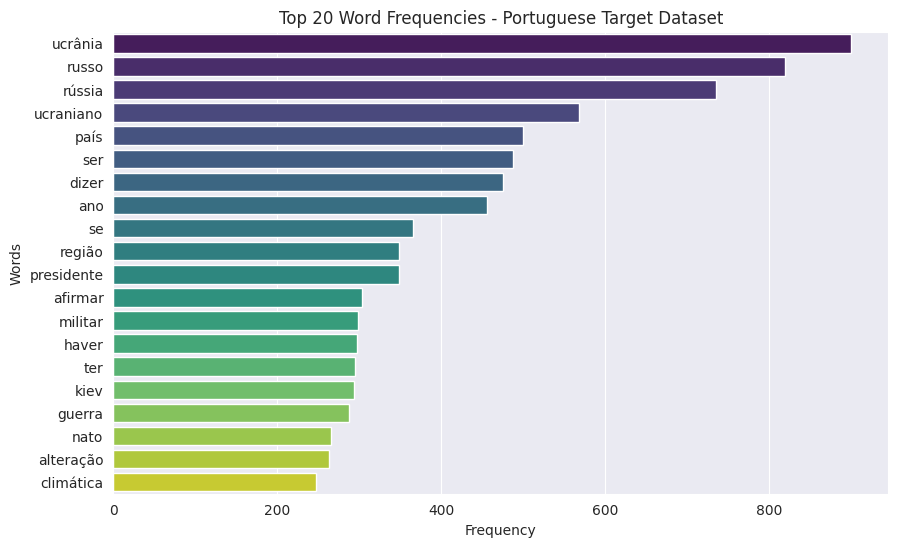

/tmp/ipykernel_13813/1773774827.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(proportions), y=list(pos_tags), palette="coolwarm")


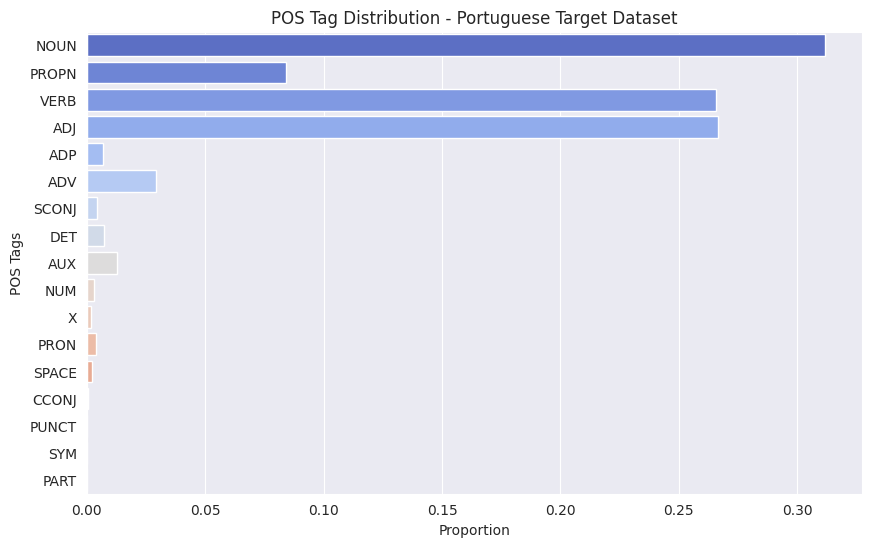

In [7]:
# Example usage
english_dir = "../target/EN/raw-documents"
portuguese_dir = "../target/PT/raw-documents"

english_analysis, english_lengths = process_directory(english_dir, nlp_en, "English Target Dataset")
portuguese_analysis, portuguese_lengths = process_directory(portuguese_dir, nlp_pt, "Portuguese Target Dataset")

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


file_path = "../training_data.csv"
data = pd.read_csv(file_path)


main_labels = data['narrative'].str.split(';')
sub_labels = data['subnarrative'].str.split(';')

# count occurrences of each label
main_label_counts = Counter(label.strip() for labels in main_labels.dropna() for label in labels)
sub_label_counts = Counter(label.strip() for labels in sub_labels.dropna() for label in labels)



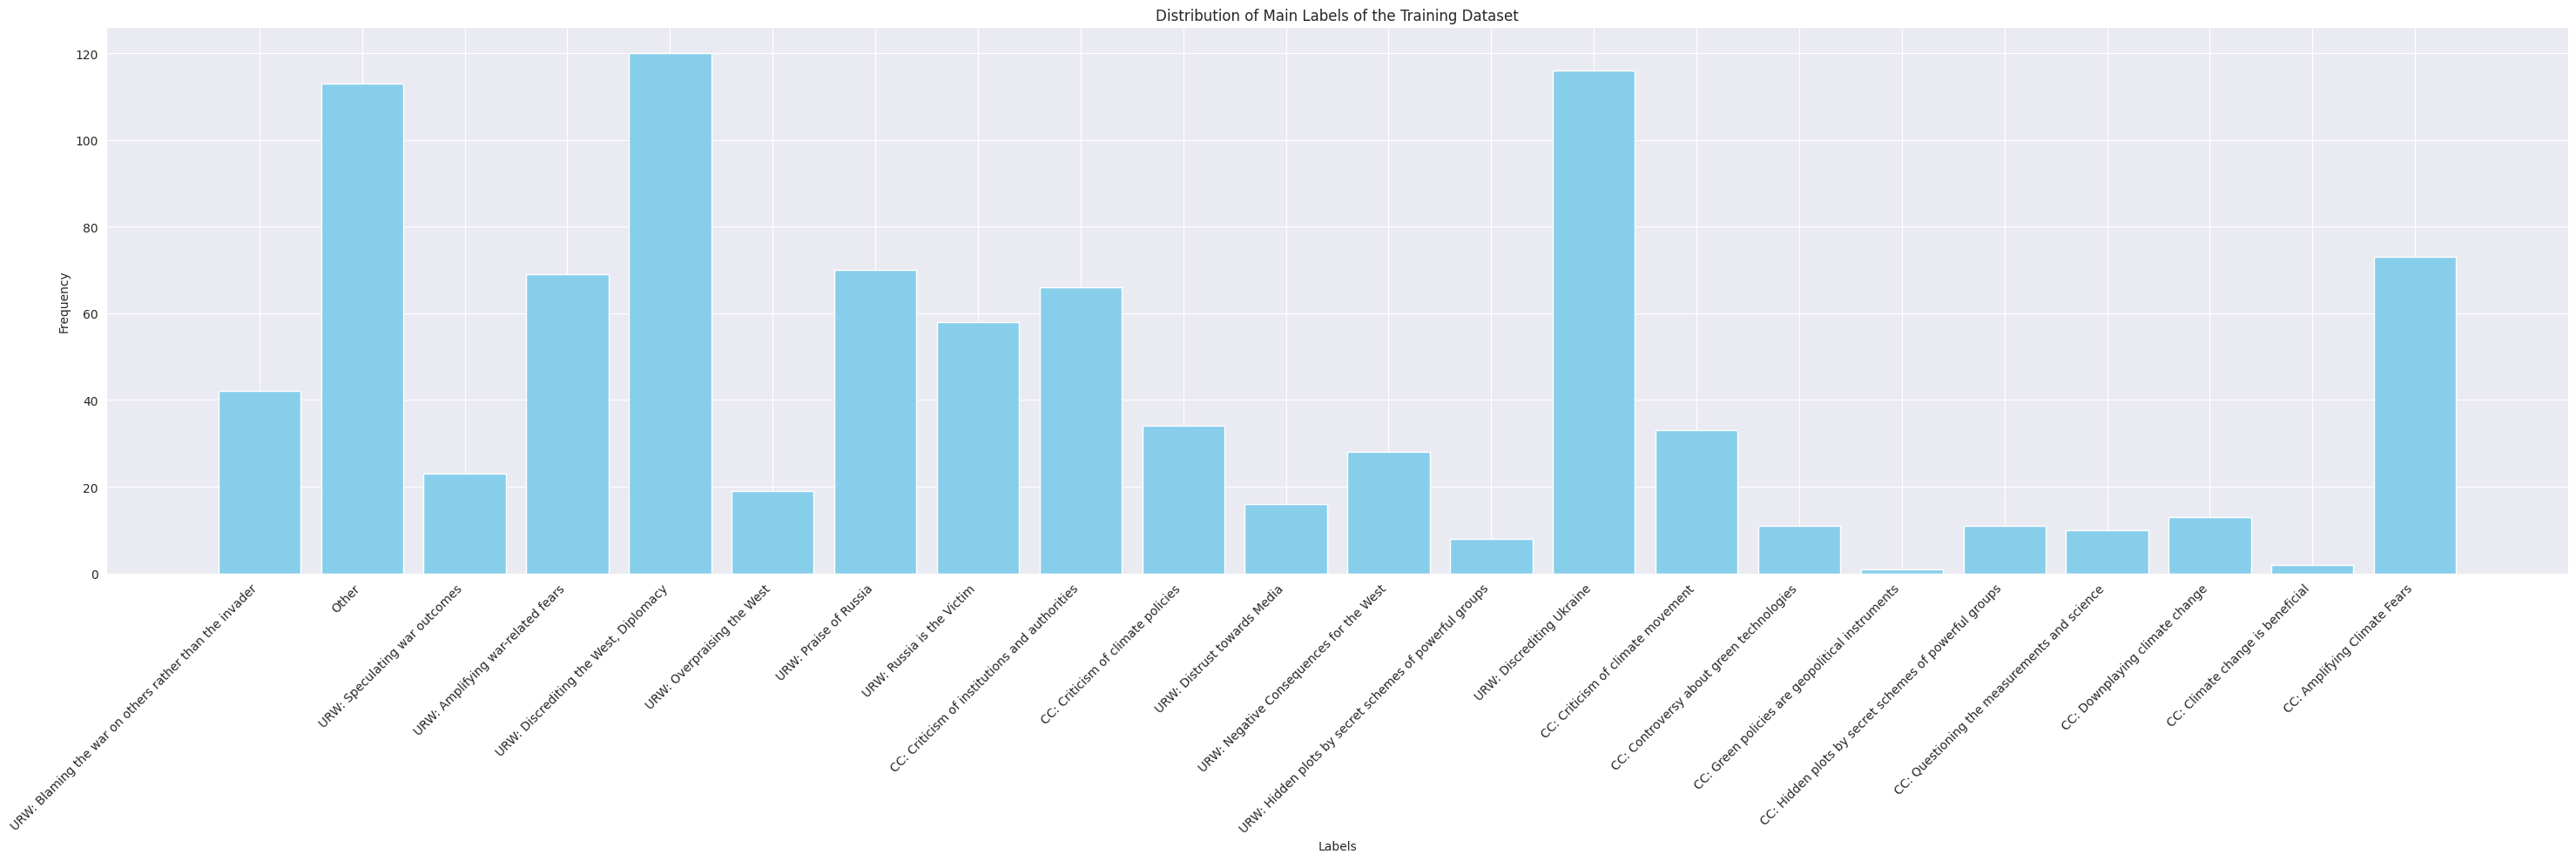

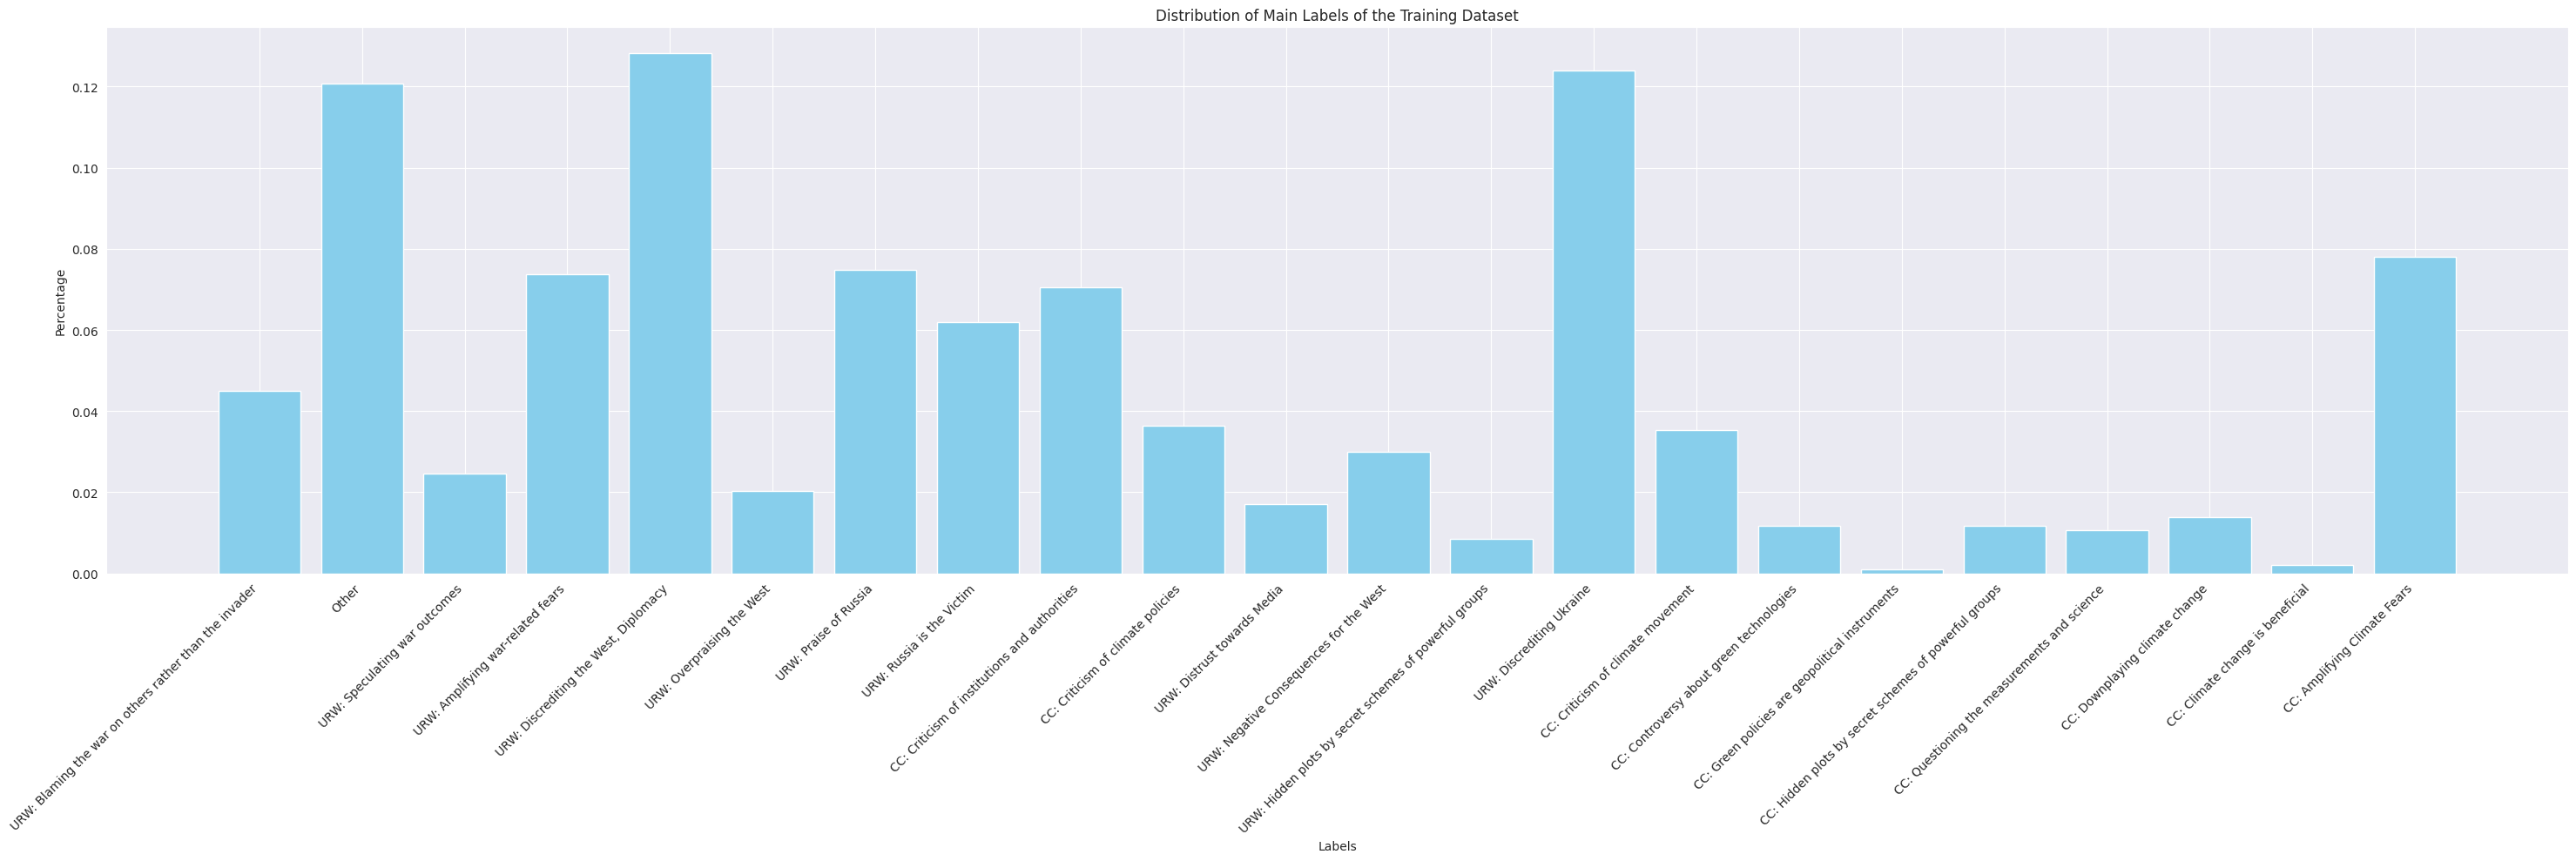

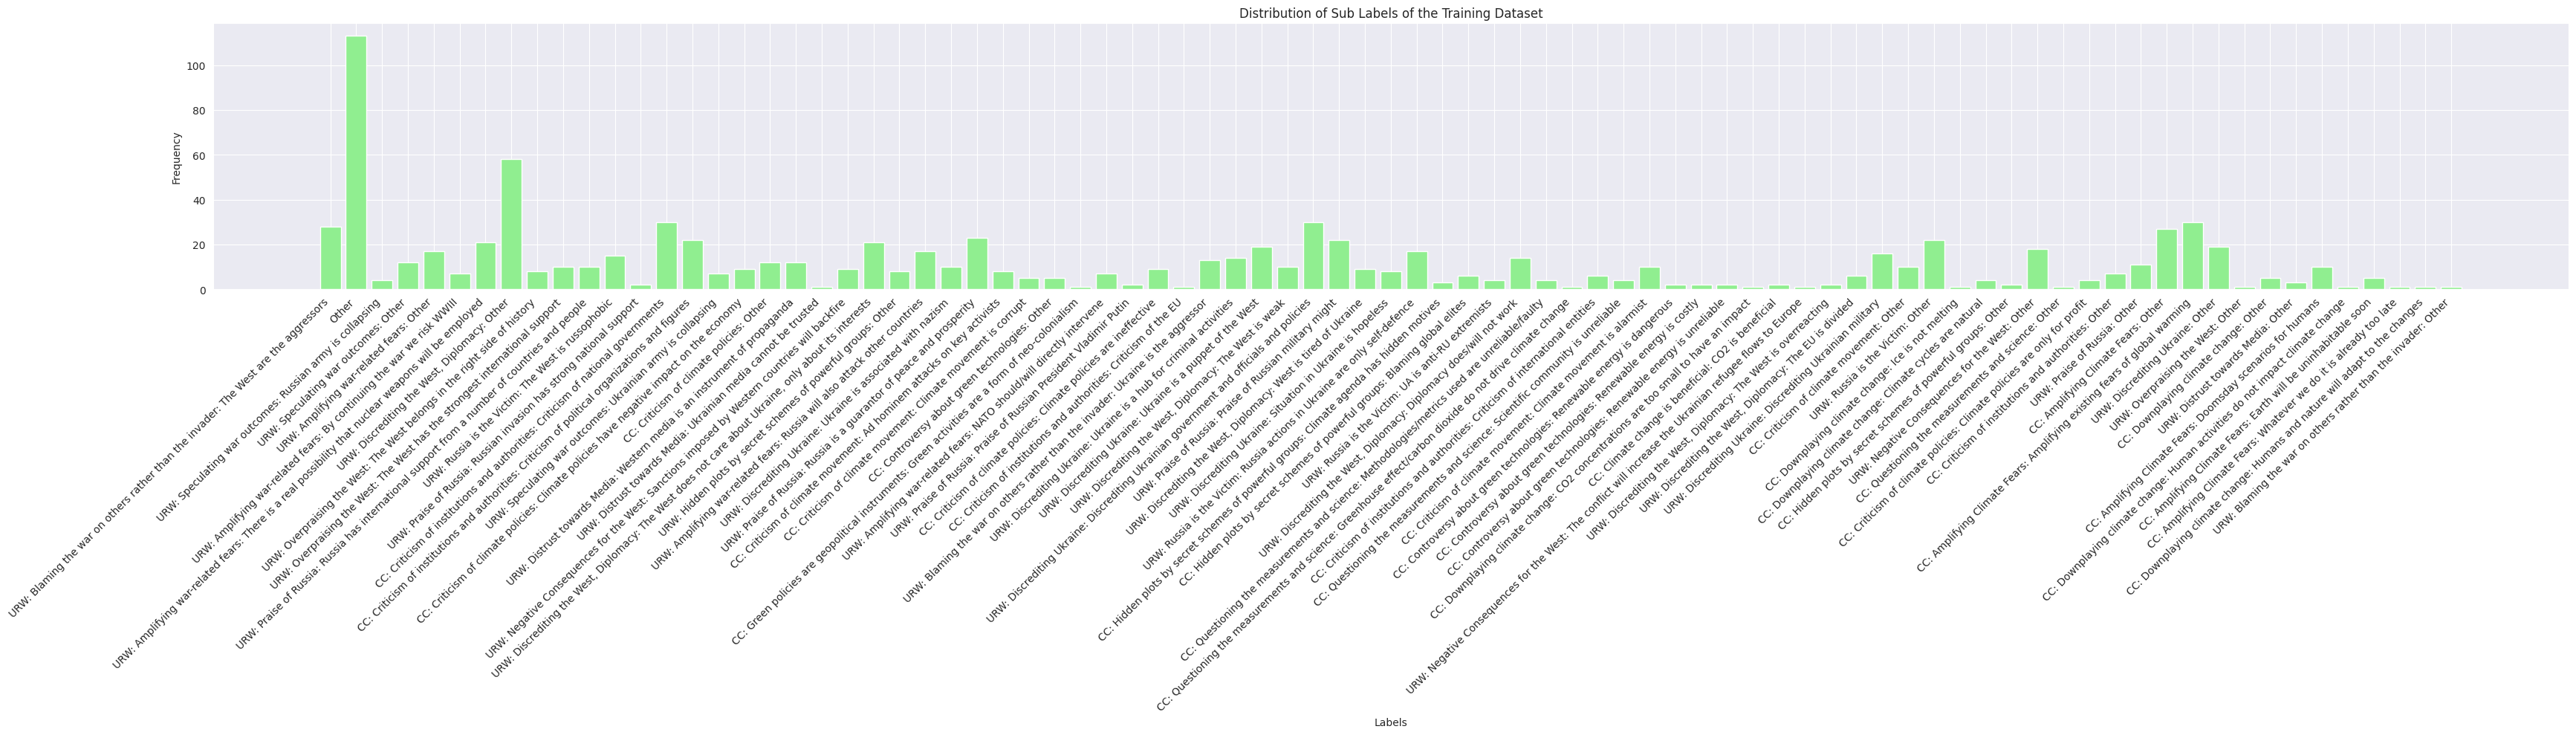

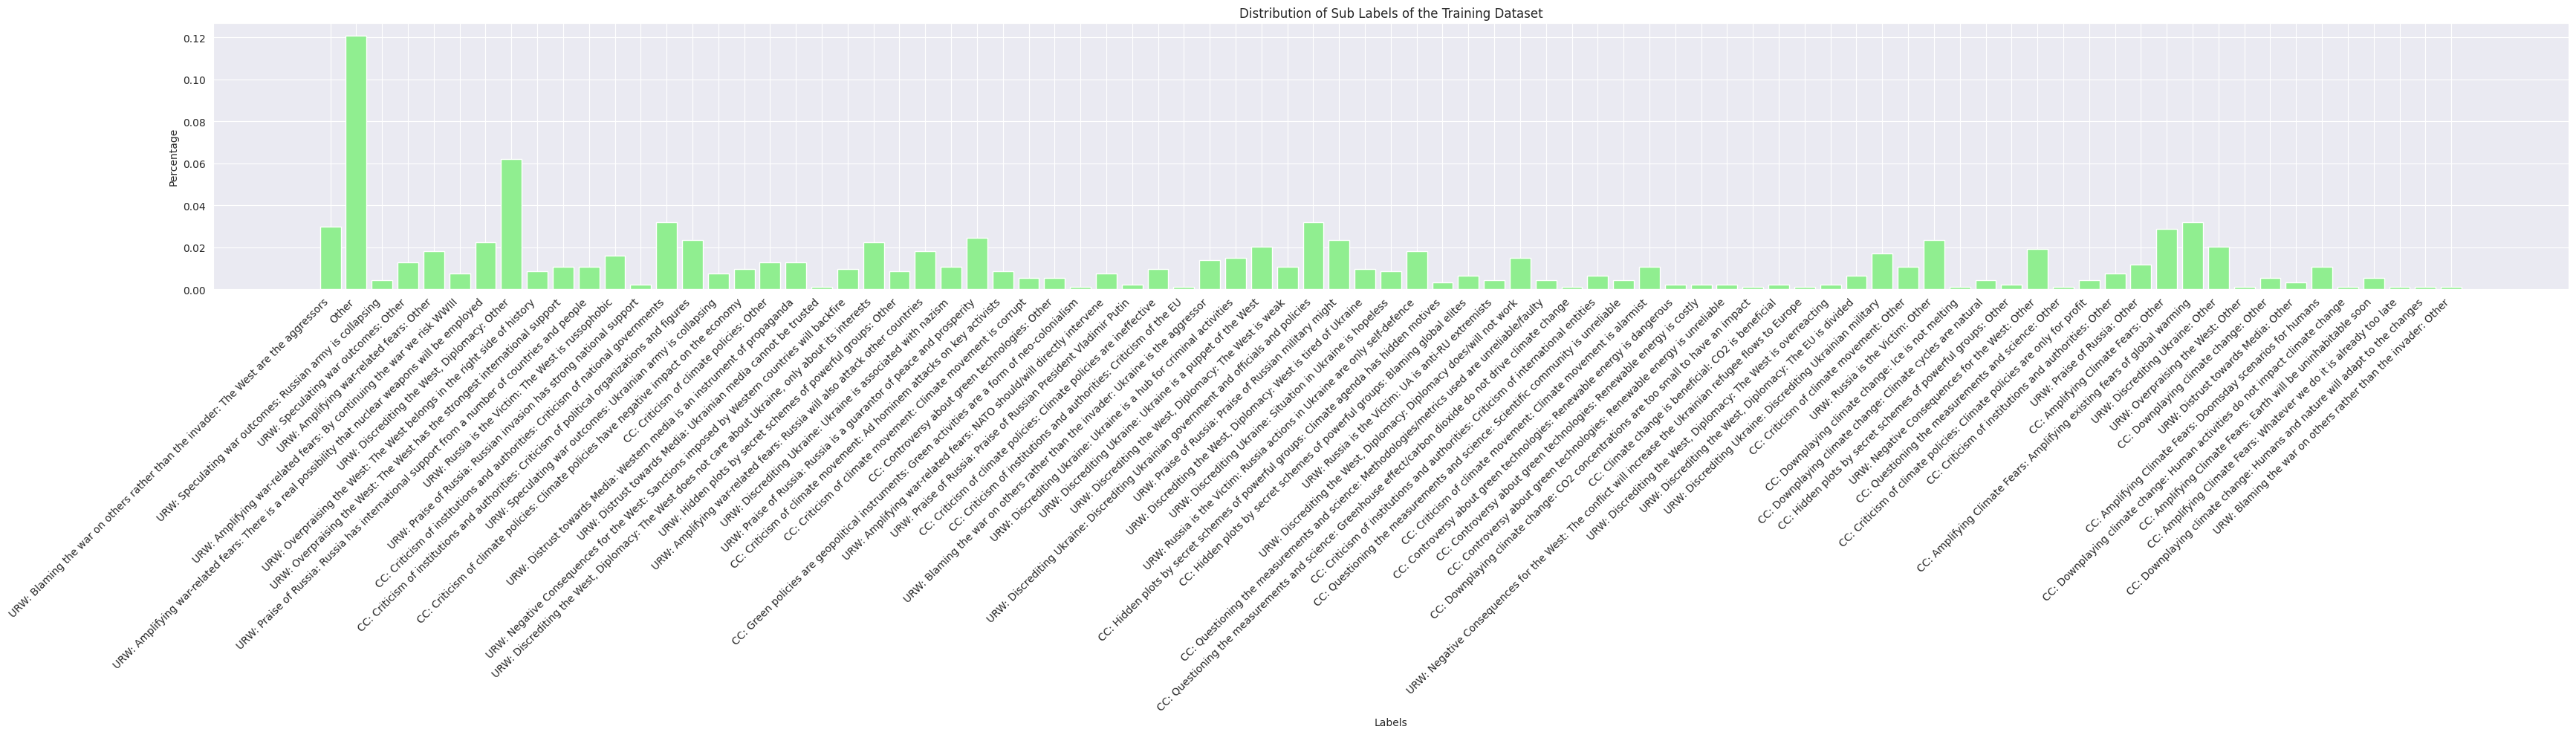

In [9]:
sum_of_main_labels = sum(main_label_counts.values())
main_label_percentage = [value / sum_of_main_labels for value in main_label_counts.values()]

# Plot the distribution of main labels in the english training dataset
plt.figure(figsize=(30, 10))
plt.bar(main_label_counts.keys(), main_label_counts.values(), color='skyblue')
plt.title("Distribution of Main Labels of the Training Dataset")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the percentage of main labels in the english training dataset
plt.figure(figsize=(30, 10))
plt.bar(main_label_counts.keys(), main_label_percentage, color='skyblue')
plt.title("Distribution of Main Labels of the Training Dataset")
plt.xlabel("Labels")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

sum_of_sub_labels = sum(sub_label_counts.values())
sub_label_percentage = [value / sum_of_main_labels for value in sub_label_counts.values()]


# Plot the distribution of sub labels in the english training dataset
plt.figure(figsize=(35, 10))
plt.bar(sub_label_counts.keys(), sub_label_counts.values(), color='lightgreen')
plt.title("Distribution of Sub Labels of the Training Dataset")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Plot the distribution of sub labels in the english training dataset
plt.figure(figsize=(35, 10))
plt.bar(sub_label_counts.keys(), sub_label_percentage, color='lightgreen')
plt.title("Distribution of Sub Labels of the Training Dataset")
plt.xlabel("Labels")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Other parts

In [10]:

file_path = "../target.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

main_labels = data['narrative'].str.split(';')
sub_labels = data['subnarrative'].str.split(';')

# Flatten and count occurrences of each label
main_label_counts = Counter(label.strip() for labels in main_labels.dropna() for label in labels)
sub_label_counts = Counter(label.strip() for labels in sub_labels.dropna() for label in labels)
print(f"total main labels: {len(main_label_counts)}, sum of main labels: {sum(main_label_counts.values())}")
print(f"total sub labels: {len(sub_label_counts)}, sum of sub labels: {sum(sub_label_counts.values())}")

total main labels: 22, sum of main labels: 2092
total sub labels: 92, sum of sub labels: 2092


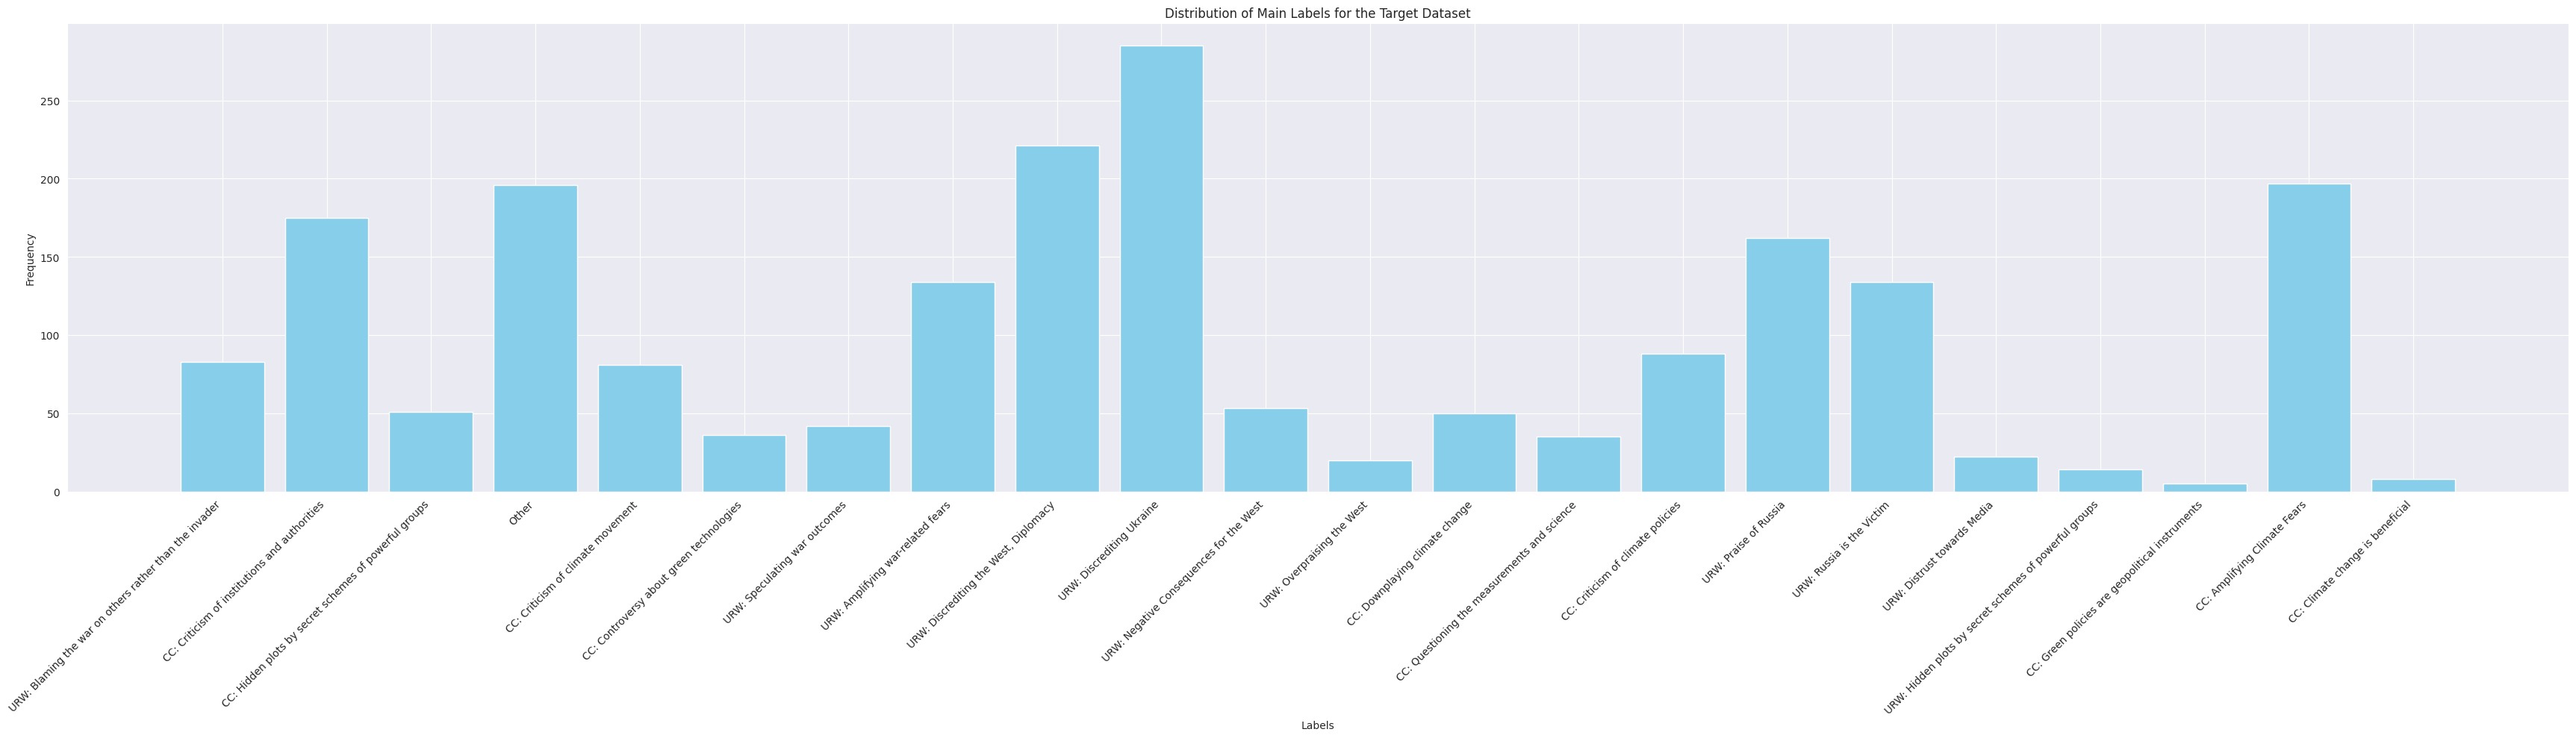

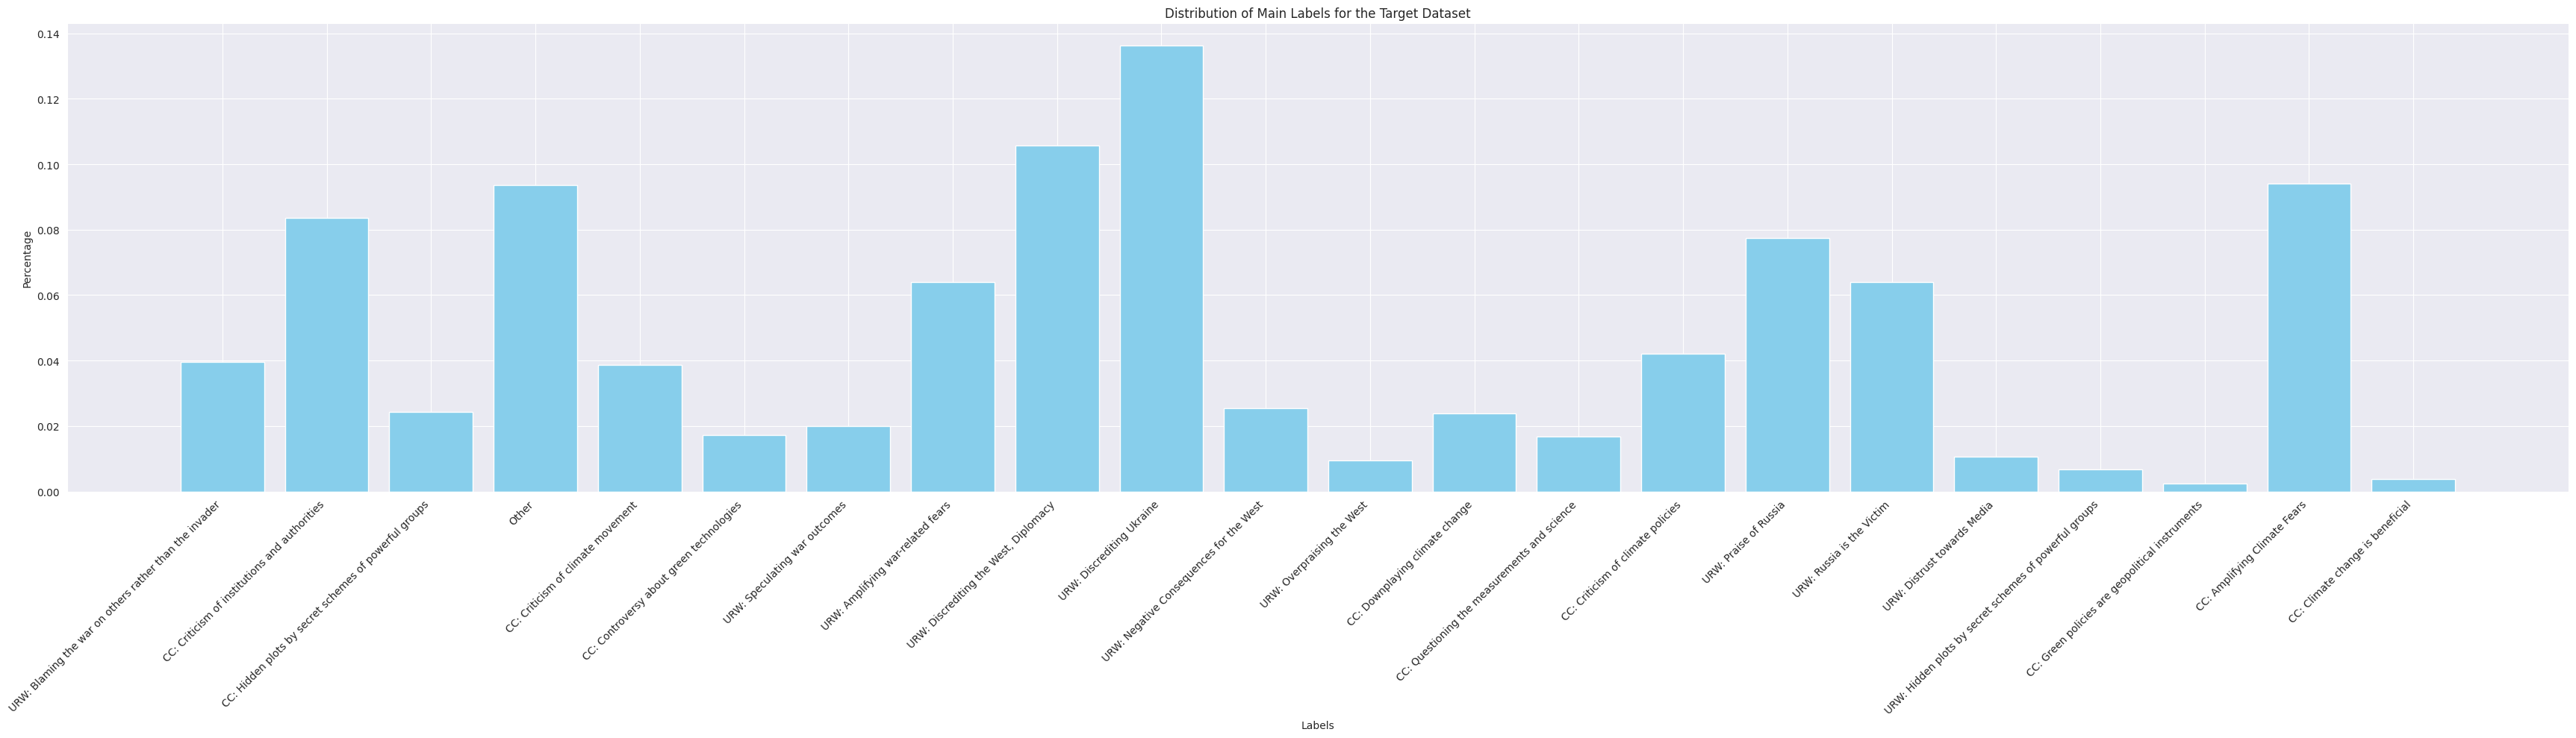

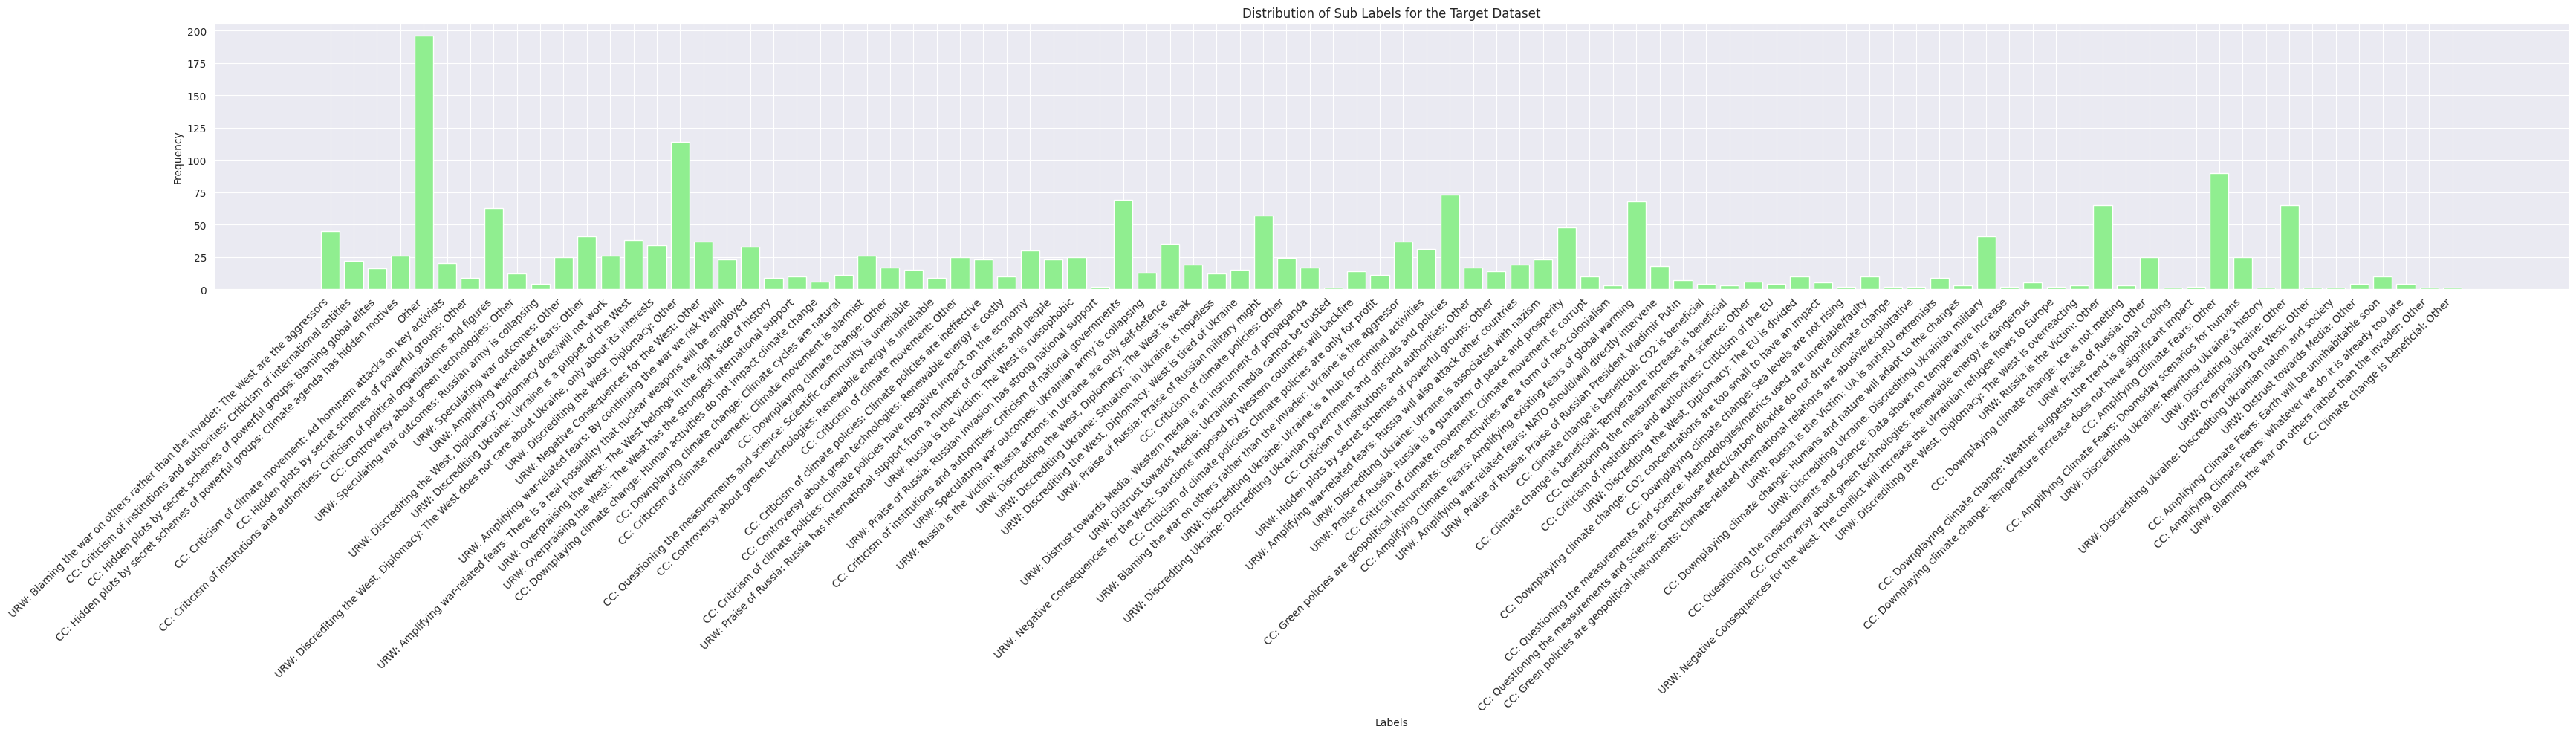

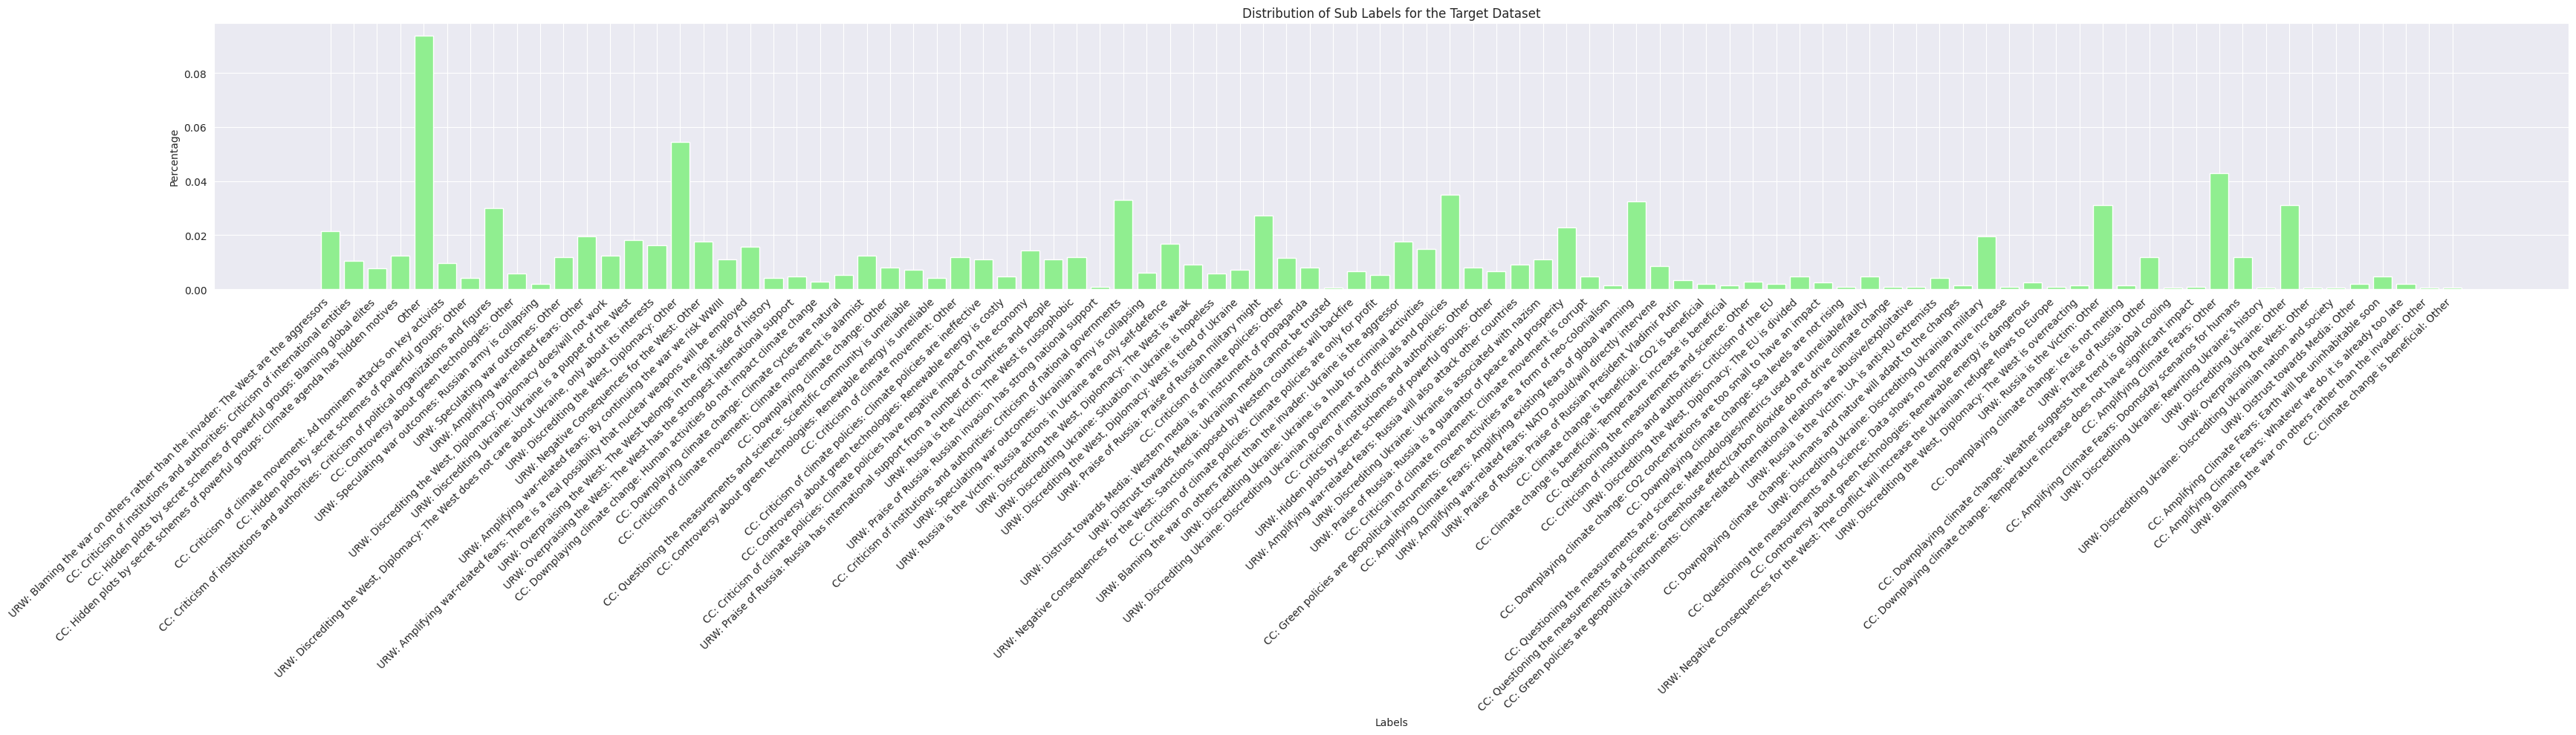

In [11]:
sum_of_main_labels = sum(main_label_counts.values())
main_label_percentage = [value / sum_of_main_labels for value in main_label_counts.values()]

# Plot the distribution of main labels
plt.figure(figsize=(35, 10))
plt.bar(main_label_counts.keys(), main_label_counts.values(), color='skyblue')
plt.title("Distribution of Main Labels for the Target Dataset")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the distribution of main labels
plt.figure(figsize=(35, 10))
plt.bar(main_label_counts.keys(), main_label_percentage, color='skyblue')
plt.title("Distribution of Main Labels for the Target Dataset")
plt.xlabel("Labels")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

sum_of_sub_labels = sum(sub_label_counts.values())
sub_label_percentage = [value / sum_of_main_labels for value in sub_label_counts.values()]


# Plot the distribution of sub labels
plt.figure(figsize=(35, 10))
plt.bar(sub_label_counts.keys(), sub_label_counts.values(), color='lightgreen')
plt.title("Distribution of Sub Labels for the Target Dataset")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Plot the distribution of sub labels
plt.figure(figsize=(35, 10))
plt.bar(sub_label_counts.keys(), sub_label_percentage, color='lightgreen')
plt.title("Distribution of Sub Labels for the Target Dataset")
plt.xlabel("Labels")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
